<a href="https://colab.research.google.com/github/harshborkar07/Titanic-EDA-Project/blob/main/Titanic_eda_task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [3]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df.head()   # shows first 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(df.shape)   # rows & columns
print(df.info())  # data types, missing values
df.head()         # first 5 rows


(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# check rows and columns
print(df.shape)

# check first 5 rows
df.head()

# check column info
df.info()

# quick stats
df.describe()

# see unique values in important columns
print(df['Sex'].value_counts())
print(df['Pclass'].value_counts())
print(df['Survived'].value_counts())

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Sex
male      577
female    314
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Survived
0    549
1    342
Name: count, dtype: int64


In [7]:
# Make a copy so original is safe
df_clean = df.copy()

# Drop "deck" column (too many missing values)
if 'deck' in df_clean.columns:
    df_clean.drop(columns=['deck'], inplace=True)

# Fill missing age with median
if 'age' in df_clean.columns:
    df_clean['age'].fillna(df_clean['age'].median(), inplace=True)

# Fill missing embarked with most common value
if 'embarked' in df_clean.columns:
    df_clean['embarked'].fillna(df_clean['embarked'].mode()[0], inplace=True)

# Check again
df_clean.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**Age** **distribution**

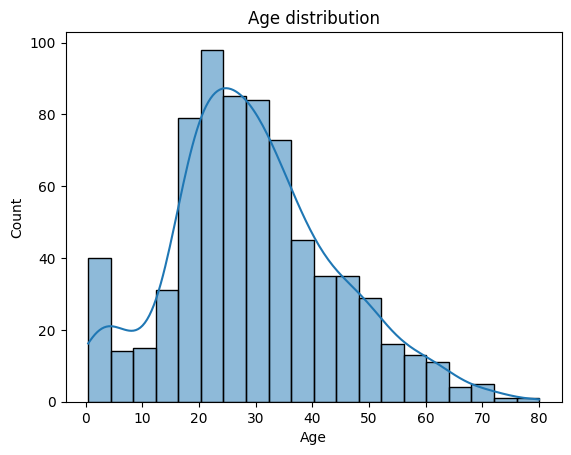

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_clean['Age'], kde=True)
plt.title('Age distribution')
plt.show()

**Surivival Count**

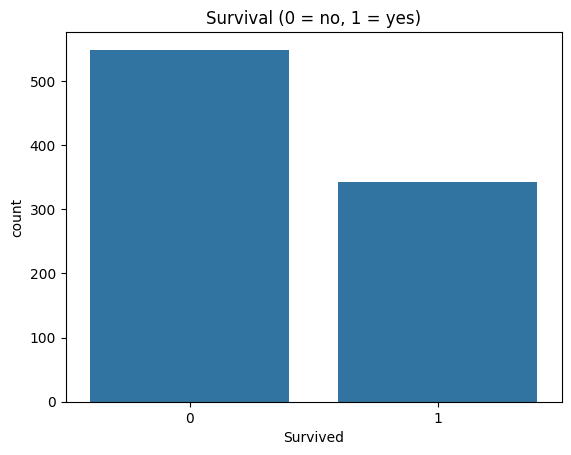

In [17]:
sns.countplot(x='Survived', data=df_clean)
plt.title('Survival (0 = no, 1 = yes)')
plt.show()

**Survival By Gender**

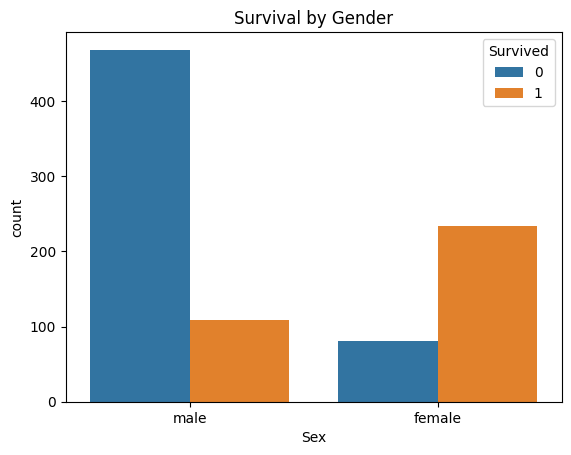

In [19]:
sns.countplot(x='Sex', hue='Survived', data=df_clean)
plt.title('Survival by Gender')
plt.show()

  **Fare By Class**

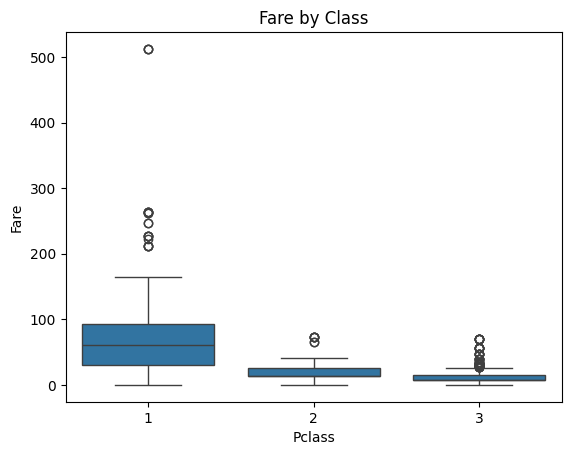

In [21]:
sns.boxplot(x='Pclass', y='Fare', data=df_clean)
plt.title('Fare by Class')
plt.show()

**Correlation Heatmap**

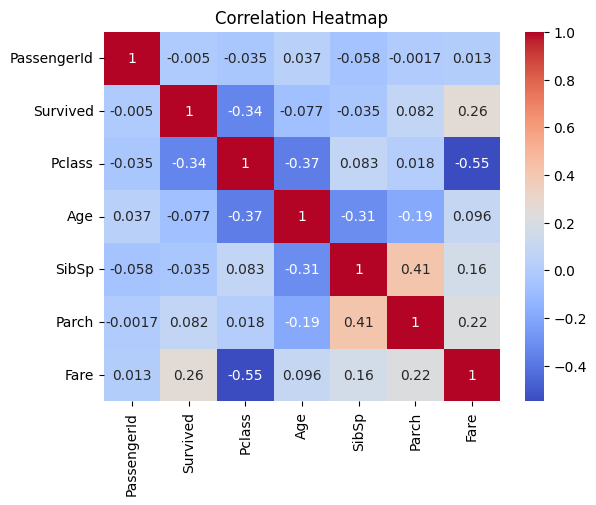

In [23]:
numeric_df_clean = df_clean.select_dtypes(include=['number'])
sns.heatmap(numeric_df_clean.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

**SUMMARY**

- Most passengers were young (20–40 years).
- More passengers died than survived.
- Females had higher survival rate than males.
- First class passengers paid more and survived more.
- Age and fare influence survival chances.
